# TensorFlow Crash Course
# Part 3 Exercises


## 1. Colorize Tim's Garden

In [1]:
import sys
sys.path.append("./task_1")

import tensorflow as tf
from Autoencoder import Autoencoder
import tensorflow_io as tfio
import matplotlib.pyplot as plt
import cv2

Model: "autoencoder_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_2 (Encoder)         multiple                  148155    
                                                                 
 decoder_2 (Decoder)         multiple                  150145    
                                                                 
Total params: 298,302
Trainable params: 297,210
Non-trainable params: 1,092
_________________________________________________________________


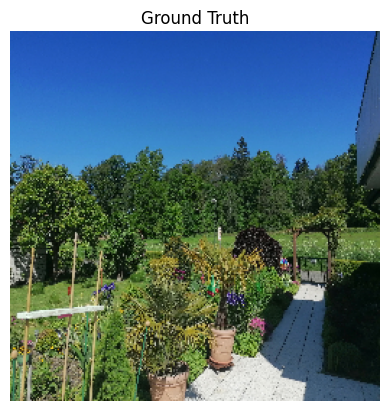

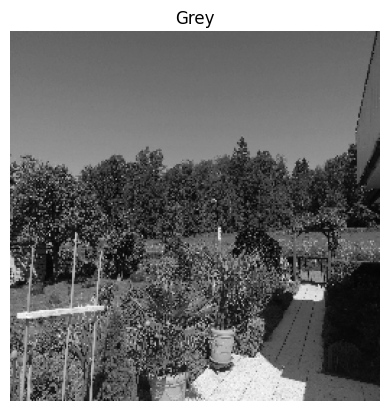

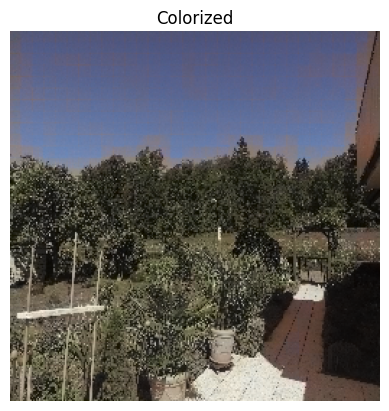

In [6]:
def getRGB(L, AB, batch_mode=True):
    # Remove normalization
    L = (L + 1)*50
    AB = ((AB - 1)*255/2)+128

    if batch_mode:
        L = tf.reshape(L, (32, 256,256,1))
        LAB = tf.concat([L, AB], 3)
    else:
        L = tf.reshape(L, (256,256,1))
        LAB = tf.concat([L, AB], 2)
    rgb = tfio.experimental.color.lab_to_rgb(LAB)

    return rgb

autoencoder = Autoencoder()
autoencoder.build((1, 256, 256, 1)) # need a batch size
autoencoder.load_weights("./task_1/trainied_weights_epoch_12").expect_partial()
autoencoder.summary()

img = plt.imread("./task_1/Garden.jpg")
img =  cv2.resize(img, (256,256))


plt.title("Ground Truth")
plt.imshow(img)
plt.axis("off")
plt.show()


gray_img = tf.reduce_mean(img, axis=-1)

plt.title("Grey")
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()


gray_img = tf.expand_dims(gray_img, axis=-1) # add color channel (grey)

gray_img = tf.expand_dims(gray_img, axis=0) # add batch dim
gray_img = tf.cast(gray_img, tf.float32)
gray_img = (gray_img/128.)-1


ab_img = autoencoder(gray_img) # get ab values

ab_img = ab_img[0] # remove batch dim
ab_img.shape
rgb_img = getRGB(gray_img, ab_img, batch_mode=False) 



plt.title("Colorized")
plt.imshow(rgb_img)
plt.axis("off")
plt.show()

## 2. Pairwise Concatenation

Given the following Tensor `x` represents a sequence of the following three elements: `[1,2,3]`, `[4,5,6]`, `[7,8,9]`.
<code>
tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)
</code>

Each element in the sequence shall be concatenated with each other - including with itself.
The result is the following tensor:
<code>
tf.Tensor: shape=(9, 6), dtype=int32, numpy=
array([[1, 2, 3, 1, 2, 3],
       [1, 2, 3, 4, 5, 6],
       [1, 2, 3, 7, 8, 9],
       [4, 5, 6, 1, 2, 3],
       [4, 5, 6, 4, 5, 6],
       [4, 5, 6, 7, 8, 9],
       [7, 8, 9, 1, 2, 3],
       [7, 8, 9, 4, 5, 6],
       [7, 8, 9, 7, 8, 9]], dtype=int32
</code>

Write code that performs this operation with `x`.

In [28]:
x = tf.constant([[1,2,3], [4,5,6], [7,8,9]])
seq_len = x.shape[0]
input_dim = x.shape[1]


x = tf.expand_dims(x, axis=1)
x = tf.tile(x, multiples=(1,seq_len,1))
    
x_transposed = tf.transpose(x, perm=(1,0,2))

x = tf.concat([x, x_transposed], axis=-1)

x = tf.reshape(x, shape=(seq_len*seq_len, 2*input_dim))

## 3. Tensor Broadcasting 

Let `a` be a tensor with a shape of `(1,2,3)`.

Let `b` be a tensor with a shape of `(3,3)`.

Explain why the operation `a+b` can not be performed.

Your answer here

## 4. Batchwise weighted sum

In [30]:
bucket_pos = tf.expand_dims(bucket_pos, axis=-1) 
bucket_input = tf.reduce_sum( tf.expand_dims(x_dash, axis=1) * bucket_pos , axis=2)

NameError: name 'bucket_pos' is not defined